# Boosting



In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay


np.random.seed(42)

# Design your algorithm
Make sure to describe the algorithm, its limitations, and describe use-cases.

### **AdaBoost Algorithm**

#### **Overview**
AdaBoost is an ensemble learning method that combines weak classifiers to create a strong classifier. It iteratively focuses on misclassified samples by adjusting their weights, ensuring subsequent classifiers prioritize harder examples.

#### **Key Concepts**
1. **Weak Classifiers**: Simple models (In our case decision stumps) that perform weak classification.
2. **Weighted Error**: Misclassified samples are weighted more heavily in subsequent iterations.
3. **Final Classifier**: Combines weak classifiers using their weighted contributions:
   $$
   H(x) = \text{sign}\left(\sum_{t=1}^T \alpha_t h_t(x)\right)
   $$

Where:
- \( H(x) \): Final prediction for the input \( x \).
- $\alpha_t$ : Weight of the \( t \)-th weak classifier, calculated as:
  $$
  \alpha_t = \frac{1}{2} \ln\left(\frac{1 - \text{error}_t}{\text{error}_t}\right)
  $$
- $h_t(x)$: Prediction of the \( t \)-th weak classifier.

**Weight Update Formula:**
$$
w_i^{(t+1)} = w_i^{(t)} \cdot \frac{e^{-\alpha_t h_t(x_i) y_i}}{2 \sqrt{\epsilon_{t+1}(1 - \epsilon_{t+1})}}
$$

**Note:** We implemented the AdaBoost algorithm using all the formulas and steps as taught in class.

#### **Hyperparameters**
- **Number of Iterations (`n_iter`)**: Controls the number of weak classifiers.
- **Learning Rate (`learning_rate`)**: Scales the contribution of each weak classifier to control the influence of each iteration.


#### **Preprocessing**
1. **Data Preprocessing**: Labels should be \(-1\) and \(1\).


#### **Limitations**
1. Computationally expensive for large datasets due to iterative training.
2. Designed primarily for binary classification.
3. No modfication with the weak classifier.

#### **Use Cases**
- Binary classification.

#### **Optimization Strategies**
1. **Vectorization**: Use NumPy to speed up operations.
2. **Early Stopping**: stops when train error is zero.
3. **Sorting Featrues Value**: Instead of grid search and find the best weak classifier we used sorting and some vectoriztion methods to make it more efficient.


# implementations


#### **Code Design Considerations**

### **Functions**

The implementation is organized into modular methods, each serving a specific purpose. Below is an explanation of the key functions with their inputs and outputs:

---

#### **`fit_weak_learner`**

- **Purpose**: Finds the best weak classifier (decision stump) for each iteration by identifying the feature, threshold, and prediction direction that minimize the weighted classification error.

- **Inputs**:
  - `X (numpy.ndarray)`: Feature matrix of shape `(n_samples, n_features)`.
  - `Y (numpy.ndarray)`: Labels array of shape `(n_samples,)` containing values `-1` or `1`.
  - `weights (numpy.ndarray)`: Array of sample weights of shape `(n_samples,)`.

- **Outputs**:
  - `best_feature (int)`: Index of the best feature to split on.
  - `best_threshold (float)`: Threshold value for the split.
  - `best_prediction (int)`: Direction of prediction (`1` for `+1 above threshold`, `-1` for `-1 above threshold`).
  - `min_error (float)`: Minimum weighted classification error.

---

#### **`predict_weak_classifier`**

- **Purpose**: Predicts labels for a single weak classifier (decision stump) based on a given feature, threshold, and prediction direction.

- **Inputs**:
  - `X (numpy.ndarray)`: Feature matrix of shape `(n_samples, n_features)`.
  - `feature (int)`: Index of the feature to use for prediction.
  - `threshold (float)`: Threshold value for the split.
  - `pred (int)`: Prediction direction (`1` for `+1 above threshold`, `-1` for `-1 above threshold`).

- **Output**:
  - `prediction (numpy.ndarray)`: Predicted labels of shape `(n_samples,)`, containing values `-1` or `1`.

---

#### **`fit`**

- **Purpose**: Trains the AdaBoost model by iteratively fitting weak classifiers, updating sample weights, and saving the importance $\alpha_t$ of each classifier.

- **Inputs**:
  - `X (numpy.ndarray)`: Feature matrix of shape `(n_samples, n_features)`.
  - `Y (numpy.ndarray)`: Labels array of shape `(n_samples,)`, containing values `-1` or `1`.

- **Outputs**:  
  - None (Model parameters are saved internally, such as `alpha_lst` and `classifier_lst`).

---

#### **`predict`**

- **Purpose**: Makes final predictions using the trained AdaBoost model by aggregating the predictions of all weak classifiers, weighted by their importance $\alpha_t$.

- **Input**:
  - `X (numpy.ndarray)`: Feature matrix of shape `(n_samples, n_features)`.

- **Output**:
  - `final_prediction (numpy.ndarray)`: Predicted labels of shape `(n_samples,)`, containing values `-1` or `1`.

---


**Parameters**:
- The `n_iter` parameter in the constructor allows customization of the number of iterations (weak classifiers).
- The `learning_rate` show how much each model will contibute, default value is 1.

**Efficient Code Design**:  
- Vectorized operations are used for calculating errors and weight updates to ensure scalability to larger datasets.  
- Sorting and cumulative sums in `fit_weak_learner` minimize redundant computations, reducing complexity.


---
#### **Algorithmic Choices**

**1. Weak Classifier (Decision Stump):**
- The `fit_weak_learner` method identifies the best feature, threshold, and prediction direction to minimize weighted classification error. We chose decision stumps to ensure they remain weak classifiers as we learned in class.
- Features are sorted for efficient threshold evaluation, and cumulative sums are used to calculate errors for thresholds.

**2. Weight Updates:**
- After each weak classifier, sample weights are updated using exponential reweighting and normalized:
$$
w_i^{(t+1)} = w_i^{(t)} \cdot \frac{e^{-\alpha_t h_t(x_i) y_i}}{2 \sqrt{\epsilon_{t+1}(1 - \epsilon_{t+1})}}
$$

**3. Alpha Calculation:**
- The importance $\alpha_t$ of each weak classifier is calculated as:
  $$
  \alpha_t = 0.5 \cdot lrate \cdot \ln\left(\frac{1 - \text{error}}{\text{error}}\right)
  $$


**4. Early Stopping:**
- If a weak classifier achieves perfect classification ($\text{error} = 0$), training stops early, as no further improvement is possible.

**5. Final Prediction:**
- The final prediction combines all weak classifiers’ outputs weighted by their $\alpha_t$ values:
  $$
  H(x) = \text{sign}\left(\sum_{t=1}^T \alpha_t h_t(x)\right)
  $$


---
#### **How It Works**
1. The algorithm starts with equal weights for all samples.
2. During each iteration:
   - A weak classifier is trained, and its weighted error is calculated.
   - Weights are updated to focus on misclassified samples.
3. After `n_iter` iterations, the final classifier combines the predictions of all weak classifiers using their respective weights.


In [ ]:
class AdaBoostCustom:
    def __init__(self, n_iter=50, learning_rate=1.0):
        """
        Initializes the AdaBoostCustom model.

        Parameters:
        n_iter (int): Number of iterations (weak classifiers) to train.
        """
        self.n_iter = n_iter
        self.alpha_lst = []
        self.classifier_lst = []
        self.learning_rate = learning_rate

    def fit_weak_learner(self, X, Y, weights):
        """
        Finds the best weak classifier (decision stump) based on the given weights.

        Parameters:
        X (numpy.ndarray): Feature matrix.
        Y (numpy.ndarray): Labels (-1, 1).
        weights (numpy.ndarray): Sample weights.

        Returns:
        tuple: Best feature, threshold, prediction direction, and minimum error.
        """
        n, n_features = X.shape
        # Initialize best parameters
        best_feature = None
        best_threshold = None
        best_prediction = None
        min_error = float('inf')

        # Precompute total weights of positives and negatives
        total_pos = np.sum(weights[Y == 1])
        total_neg = np.sum(weights[Y == -1])

        for feature in range(n_features):
            # Sort samples by the current feature
            sorted_idx = np.argsort(X[:, feature])
            X_sorted = X[sorted_idx, feature]
            Y_sorted = Y[sorted_idx]
            W_sorted = weights[sorted_idx]

            # Compute cumulative sums of positive and negative class weights
            cumulative_pos = np.cumsum(W_sorted * (Y_sorted == 1))
            cumulative_neg = np.cumsum(W_sorted * (Y_sorted == -1))


            indices = np.arange(n - 1)

            error_plus = cumulative_pos[indices] + (total_neg - cumulative_neg[indices])
            error_minus = cumulative_neg[indices] + (total_pos - cumulative_pos[indices])

            # Find the minimal errors and corresponding thresholds
            thresholds = (X_sorted[indices] + X_sorted[indices + 1]) / 2.0

            # Check minimal error for pred = +1
            idx_min_plus = np.argmin(error_plus)
            if error_plus[idx_min_plus] < min_error:
                min_error = error_plus[idx_min_plus]
                best_feature = feature
                best_threshold = thresholds[idx_min_plus]
                best_prediction = 1

            # Check minimal error for pred = -1
            idx_min_minus = np.argmin(error_minus)
            if error_minus[idx_min_minus] < min_error:
                min_error = error_minus[idx_min_minus]
                best_feature = feature
                best_threshold = thresholds[idx_min_minus]
                best_prediction = -1

        return best_feature, best_threshold, best_prediction, min_error

    def predict_weak_classifier(self, X, feature, threshold, pred):
        """
        Predicts labels using a weak classifier.

        Parameters:
        X (numpy.ndarray): Feature matrix.
        feature (int): Feature index.
        threshold (float): Threshold value.
        pred (int): Prediction direction (1 or -1).

        Returns:
        numpy.ndarray: Predicted labels.
        """

        n = X.shape[0]
        prediction = np.ones(n)
        # Label all the samples under the threshold as -1
        if pred == 1:
            prediction[X[:, feature] < threshold] = -1

        # Label all the samples above the threshold as -1
        else:
            prediction[X[:, feature] > threshold] = -1
        return prediction

    def fit(self, X, Y):
        """
        Trains the AdaBoost model.

        Parameters:
        X (numpy.ndarray): Feature matrix.
        Y (numpy.ndarray): Labels (-1, 1).
        """
        n = X.shape[0]
        weights = np.ones(n) / n
        if np.any(np.isin(Y, [0])):
            Y = np.where(Y == 0, -1, 1)

        for _ in range(self.n_iter):
            # Fit and save weak classifier
            feature, threshold, pred, error = self.fit_weak_learner(X, Y, weights)
            self.classifier_lst.append((feature, threshold, pred))

            # Break when perfect classification (error = 0)
            if error == 0:
                self.alpha_lst.append(float('inf'))  # Perfect classifier
                self.classifier_lst.append((feature, threshold, pred))
                break

            # Avoid divide zero or log(0)
            error = max(error, 1e-10)
            error = min(error, 1 - 1e-10)

            # Calc and save Alpha
            alpha = self.learning_rate * 0.5 * np.log((1 - error) / error)
            self.alpha_lst.append(alpha)

            # Calc new weights
            curr_prediction = self.predict_weak_classifier(X, feature, threshold, pred)
            weights *= np.exp(-alpha * Y * curr_prediction)
            weights /= (2 * np.sqrt(error * (1 - error)))

    def predict(self, X):
        """
        Makes predictions using the trained AdaBoost model.

        Parameters:
        X (numpy.ndarray): Feature matrix.

        Returns:
        numpy.ndarray: Final predictions.
        """
        n = X.shape[0]
        final_prediction = np.zeros(n)

        # Predict with the final alpha list and classifier list
        for alpha, (feature, threshold, pred) in zip(self.alpha_lst, self.classifier_lst):
            curr_prediction = self.predict_weak_classifier(X, feature, threshold, pred)
            final_prediction += alpha * curr_prediction

        return np.sign(final_prediction)


# Generate data
Please use the cell below to discuss your dataset choice and why it is appropriate (or not) for this algorithm.

### **Dataset Choice and Justification**

For this demonstration, we use a simulated dataset generated with `sklearn.datasets.make_classification`.

- **Dataset Characteristics**:
  - **Number of Samples**: 200
  - **Features**: 2 informative features, ensuring simplicity while maintaining some complexity.
  - **Class Separability**: Moderately separable (`class_sep=1.0`), introducing a slight classification challenge.

- **Reason for Choice**:
  - The simplicity of this dataset makes it ideal for testing AdaBoost, as it allows for clear visualization of decision boundaries.
  - The moderate complexity highlights AdaBoost's strength in iteratively improving weak classifiers.
  - Debugging and validating the algorithm is easier with a manageable dataset like this.

- This dataset effectively demonstrates AdaBoost's ability to handle binary classification (\(-1\) and \(1\)) while showcasing its iterative improvement process.


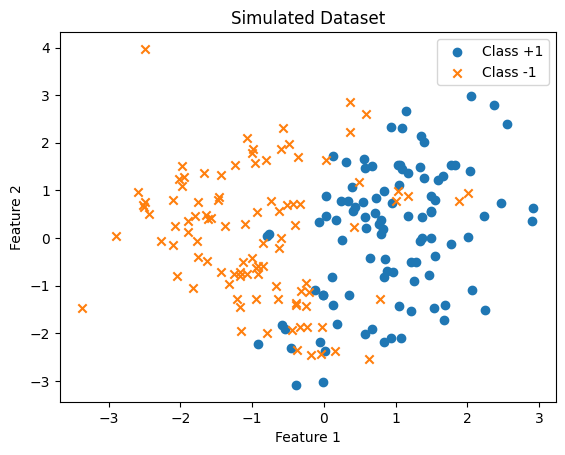

In [ ]:
# Simulated dataset characteristics
n_samples = 200
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 42

# Generate dataset
X, Y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    random_state=random_state,
    class_sep=1.0
)

# Convert labels to -1 and 1
Y = np.where(Y == 0, -1, 1)

# Visualize dataset
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label="Class +1", marker="o")
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], label="Class -1", marker="x")
plt.legend()
plt.title("Simulated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# AdaBoost demonstration
Demonstrate your AdaBoost implementation.

Add plots and figures.

Please use the cell below to describe your results and tests.

Describe the difference between your implementation and the sklearn implementation. Hint: you can look at the documentation.


### **Comparison Between Custom AdaBoost and Scikit-Learn Implementation**

#### **Custom AdaBoost Implementation**
- **Key Points**:
  - Implemented from scratch using NumPy.
  - Manually optimized weak classifiers using a vectorized approach.
  - Uses desicion stumps as the weak classifiers.





#### **Scikit-Learn AdaBoost Implementation**
- **Default Implementation**:
  - Leverages scikit-learn's optimizations for efficiency and scalability.
  - Allows for specifying the type of weak classifiers (decision tree depth, logistic regression).
  - Provides flexibility to fine-tune the algorithm.

#### **Hyperparameter Choice**
- For the test dataset, the following hyperparameters were chosen:
  - **Number of Iterations (`n_iter`)**: 50
    - This ensures the AdaBoost model has enough iterations to learn from misclassified samples while avoiding overfitting on a small dataset.
  - **Learning Rate (`learning_rate`)**: 1.0
    - A standard learning rate was selected to give each weak classifier an equal contribution without scaling excessively.
  - **Weak Classifier**: Decision stumps
    - To ensure a fair comparison with our custom AdaBoost implementation, we used scikit-learn's default weak classifier (decision stumps).


#### **Results Analysis**
1. **Accuracy**:
   - Both the custom implementation and scikit-learn's implementation achieved an accuracy of ~**0.83**, indicating that the custom code is functioning correctly.

2. **Decision Boundary**:
   - The decision boundary of the custom implementation closely resembles scikit-learn's implementation with specified weak classifiers.
   - However, when using the default scikit-learn settings, the boundary appears slightly different, likely due to optimizations or the choice of weak classifiers.








Custom AdaBoost Accuracy: 0.83
sklit AdaBoost Accuracy: 0.83


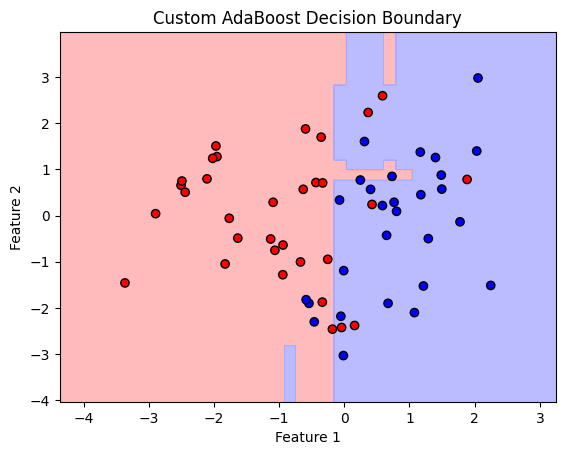

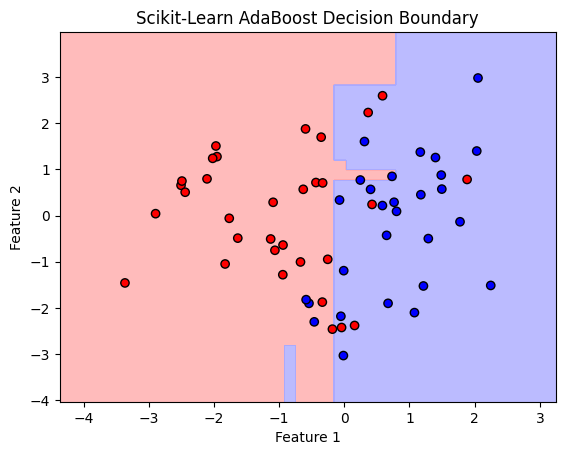

In [ ]:
# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train AdaBoostCustom model
custom_model = AdaBoostCustom(n_iter=50)
custom_model.fit(X_train, Y_train)

# Predict and evaluate
custom_predictions = custom_model.predict(X_test)
custom_accuracy = np.mean(custom_predictions == Y_test)
print(f"Custom AdaBoost Accuracy: {custom_accuracy:.2f}")

# Train scikit AdaBoost
sklearn_model = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME")
sklearn_model.fit(X_train, Y_train)

# Predict and evaluate
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = np.mean(sklearn_predictions == Y_test)
print(f"sklit AdaBoost Accuracy: {sklearn_accuracy:.2f}")

def plot_decision_boundary(model, X, Y, title):
    # Define the boundaries of the grid based on the input features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 

    # Create a meshgrid of points with a fine resolution to cover the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict class labels for each point in the meshgrid
    # If model is a custom AdaBoost implementation, use its predict method
    if isinstance(model, AdaBoostCustom):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(custom_model, X_test, Y_test, "Custom AdaBoost Decision Boundary")
plot_decision_boundary(sklearn_model, X_test, Y_test, "Scikit-Learn AdaBoost Decision Boundary")



# Generate additional data sets
Generate at least two experimental datasets with binary labels, designed to demonstrate specific properties of AdaBoost (e.g., handling noise or overfitting).

Add plots and figures.

Please use the cell below to describe your suggested approach in detail. Use formal notations where appropriate.

Describe and discuss your results.

### **Dataset Design**

We created two experimental datasets with binary labels to test the performance and limitations of the AdaBoost algorithm:

1. **Dataset 1: Noisy Data**
   - **Purpose**: Designed to evaluate the algorithm's behavior with noisy labels.
   - **Characteristics**:
     - 30% of the labels are randomly flipped to simulate noise, making the classification problem more challenging.
     - Contains 10 features, of which 5 are informative, 2 are redundant, and 3 are noise.
     - Moderate class separability (`class_sep=1.5`) ensures the dataset is not overly simplistic.
   - **Expectation**:
     - AdaBoost might struggle with noisy data because it increases the weights of misclassified samples in each iteration, including noisy examples, which can cause the algorithm to focus disproportionately on these incorrect labels and lead to overfitting.

2. **Dataset 2: Overfitting-Prone Data**
   - **Purpose**: The purpose of the second dataset is to evaluate AdaBoost's ability to handle data with non-linear decision boundaries, which can be challenging for AdaBoost due to its use on simple weak classifiers like decision stumps that struggle to capture complex patterns.
   - **Characteristics**:
     - Based on the "moons" dataset with added Gaussian noise (`noise=0.3`), creating overlapping classes.
     - The dataset requires the algorithm to balance generalization with fitting the noisy boundary.
   - **Expectation**:
     - For the second dataset, we expect AdaBoost to improve over time by iteratively combining multiple linear classifiers. The ensemble of many weak classifiers should progressively capture the separability in the data, leading to better performance with more iterations.

**Split the data**: The datasets were split 70% for training and 30% for testing, ensuring enough data for model training while reserving a significant portion for performance evaluation on unseen data.

In [ ]:
# Dataset 1: Noisy 2D Data
X1, Y1 = make_classification(
    n_samples=2000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    flip_y=0.35,
    class_sep=1.0,
    random_state=42
)

# Dataset 2: Overfitting-Prone Data
X2, Y2 = make_moons(n_samples=2000, noise=0.3, random_state=42)

# Split datasets into train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

datasets = {
    "Dataset 1": (X1_train, X1_test, Y1_train, Y1_test),
    "Dataset 2": (X2_train, X2_test, Y2_train, Y2_test)
}

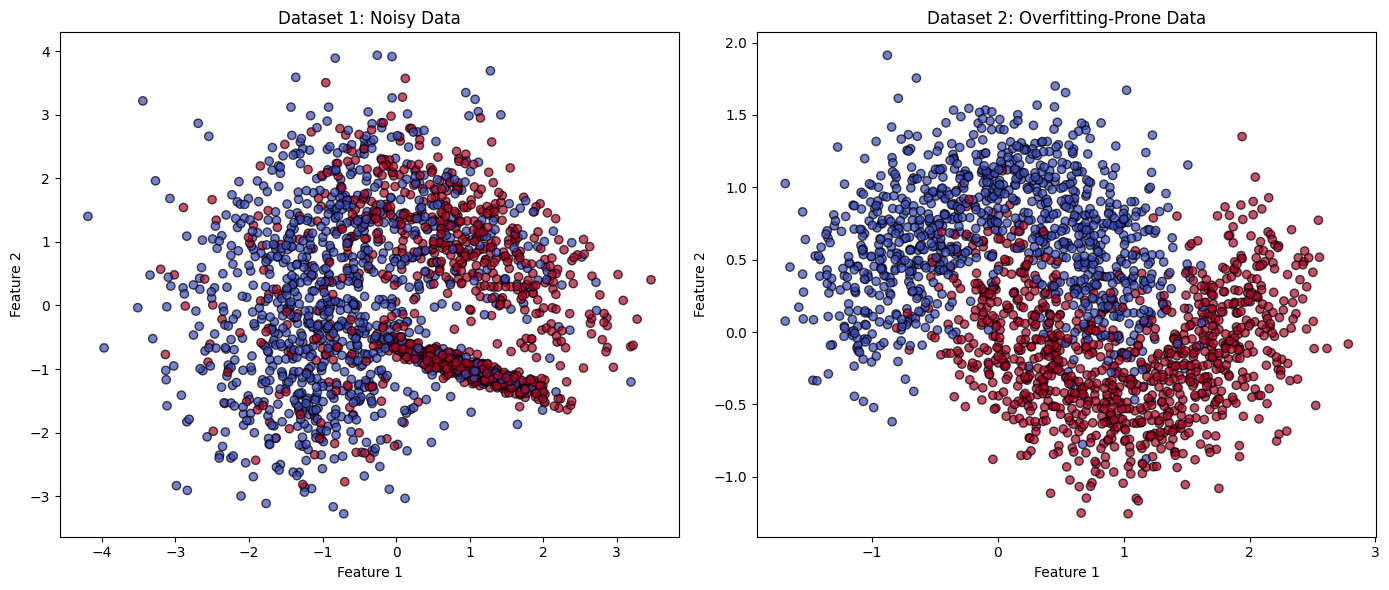

In [ ]:
# Visualize the datasets in 2D using PCA 
def plot_dataset(X, Y, title, ax):

    scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm", edgecolor="k", alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("Feature 1" if X.shape[1] == 2 else "Principal Component 1")
    ax.set_ylabel("Feature 2" if X.shape[1] == 2 else "Principal Component 2")
    return scatter

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_dataset(X1, Y1, "Dataset 1: Noisy Data", axes[0])
plot_dataset(X2, Y2, "Dataset 2: Overfitting-Prone Data", axes[1])
plt.tight_layout()
plt.show()

# Test algorithms
Test your AdaBoost, a library implementation of AdaBoost and at least two additional models, one of which must be another boosting algorithm on your two datasets.

Add plots and figures.

Please use the cell below to describe your suggested approach in detail. Use formal notations where appropriate.

Describe and discuss your results.


#### **Model Selection**

We will evaluate the following models:
1. **AdaBoost**: As asked.
2. **Our Custom AdaBoost**: As asked.
3. **Random Forest**: A non-boosting ensemble method for baseline comparison.
4. **Gradient Boosting**: A different boosting algorithm for comparison.




In [ ]:
# Models
models = {
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42),
}

# Define hyperparameter grids for each model
param_grids = {
    "AdaBoost": {
        "estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1],
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5],
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5, 10]
    }
}
param_grid_custom_adaboost = {"n_iter": [50,100, 200, 500, 1000], "learning_rate": [0.01, 0.1, 0.5, 0.7, 1]}


In [ ]:
# Results storage
best_models = {}

# Perform manual parameter search for sklearn models for each dataset
for dataset_name, (X_train, X_test, Y_train, Y_test) in datasets.items():
    best_models[dataset_name] = {}

    for model_name, model in models.items():
        if model_name == "AdaBoost":
            # Manual search for AdaBoost
            # We had some problem with the GridSearchCV so we split the trainning
            best_score = -np.inf
            best_params = None
            best_model = None

            # Grid search on the parameters grid
            for estimator in param_grids["AdaBoost"]["estimator"]:
                for n_estimators in param_grids["AdaBoost"]["n_estimators"]:
                    for learning_rate in param_grids["AdaBoost"]["learning_rate"]:
                        model = AdaBoostClassifier(
                            estimator=estimator,
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            algorithm="SAMME",
                            random_state=42
                        )
                        model.fit(X_train, Y_train)
                        # Evaluate on test set
                        Y_pred = model.predict(X_test)
                        accuracy = accuracy_score(Y_test, Y_pred)

                        if accuracy > best_score:
                            best_score = accuracy
                            best_params = {
                                "estimator": estimator,
                                "n_estimators": n_estimators,
                                "learning_rate": learning_rate,
                            }
                            best_model = model

            # Save the best AdaBoost model for the dataset
            best_models[dataset_name][model_name] = {
                "best_estimator": best_model,
                "best_params": best_params,
                "best_score": best_score,
            }

            print(f"Best parameters for {model_name} on {dataset_name}: {best_params}")
        else:
            # GridSearchCV for other sklearn models
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[model_name],
                scoring="accuracy",
                cv=3,  
                verbose=0,
                n_jobs=-1  
            )

            grid_search.fit(X_train, Y_train)

            # Save the best model for the dataset
            best_models[dataset_name][model_name] = {
                "best_estimator": grid_search.best_estimator_,
                "best_params": grid_search.best_params_,
                "best_score": grid_search.best_score_,
            }

            print(f"Best parameters for {model_name} on {dataset_name}: {grid_search.best_params_}")

    # Custom grid search for AdaBoostCustom
    best_score_custom = -np.inf
    best_params_custom = None
    best_model_custom = None

    for n_iter in param_grid_custom_adaboost["n_iter"]:
        for learning_rate in param_grid_custom_adaboost["learning_rate"]:
            # Train the custom AdaBoost
            model = AdaBoostCustom(n_iter=n_iter, learning_rate=learning_rate)
            model.fit(X_train, Y_train)

            # Evaluate on test set
            Y_pred = model.predict(X_test)

            # Change the labels, our AdaBoost return -1,1 labels
            Y_test_adaboost = np.where(Y_test == 0, -1, 1)
            accuracy = accuracy_score(Y_test_adaboost, Y_pred)

            if accuracy > best_score_custom:
                best_score_custom = accuracy
                best_params_custom = {"n_iter": n_iter, "learning_rate": learning_rate}
                best_model_custom = model

    # Save the best custom AdaBoost model for the dataset
    best_models[dataset_name]["Custom AdaBoost"] = {
        "best_estimator": best_model_custom,
        "best_params": best_params_custom,
        "best_score": best_score_custom,
    }

    print(f"Best parameters for Custom AdaBoost on {dataset_name}: {best_params_custom}")


Best parameters for AdaBoost on Dataset 1: {'estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 100, 'learning_rate': 0.1}
Best parameters for Gradient Boosting on Dataset 1: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best parameters for Random Forest on Dataset 1: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for Custom AdaBoost on Dataset 1: {'n_iter': 50, 'learning_rate': 1}
Best parameters for AdaBoost on Dataset 2: {'estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 200, 'learning_rate': 0.1}
Best parameters for Gradient Boosting on Dataset 2: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best parameters for Random Forest on Dataset 2: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters for Custom AdaBoost on Dataset 2: {'n_iter': 500, 'learning_rate': 0.5}


Accuracy of Custom AdaBoost on Dataset 1: 0.77
Accuracy of Custom AdaBoost on Dataset 2: 0.91


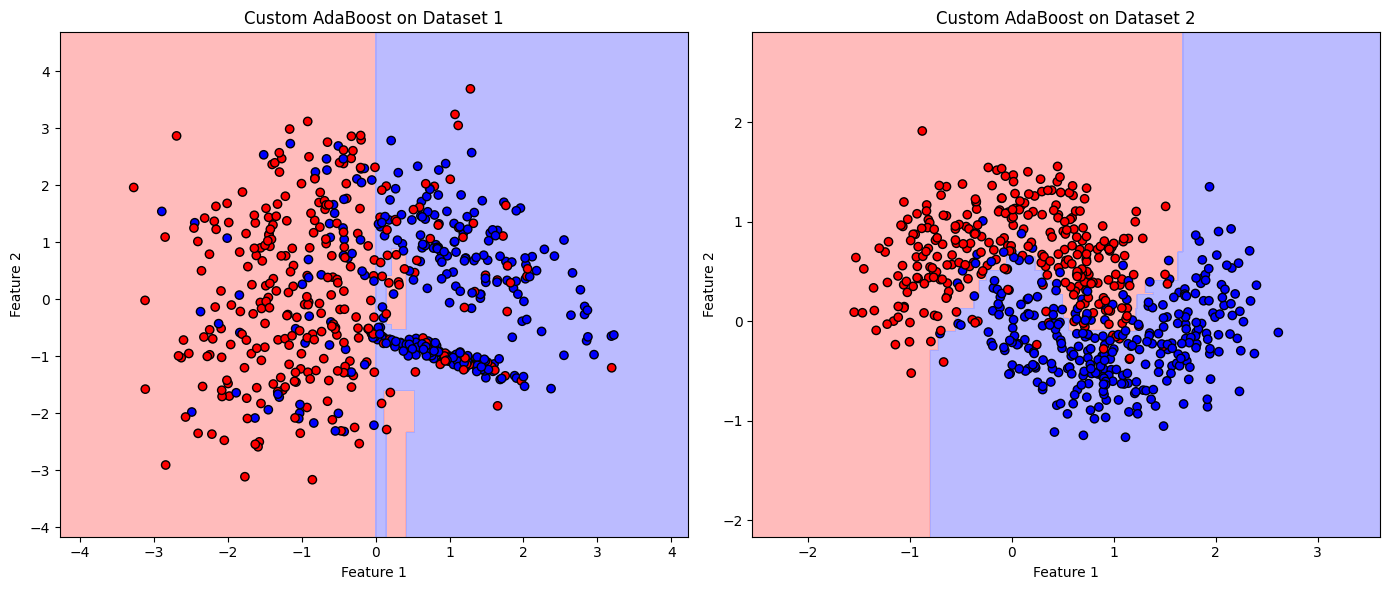

Models Compression:


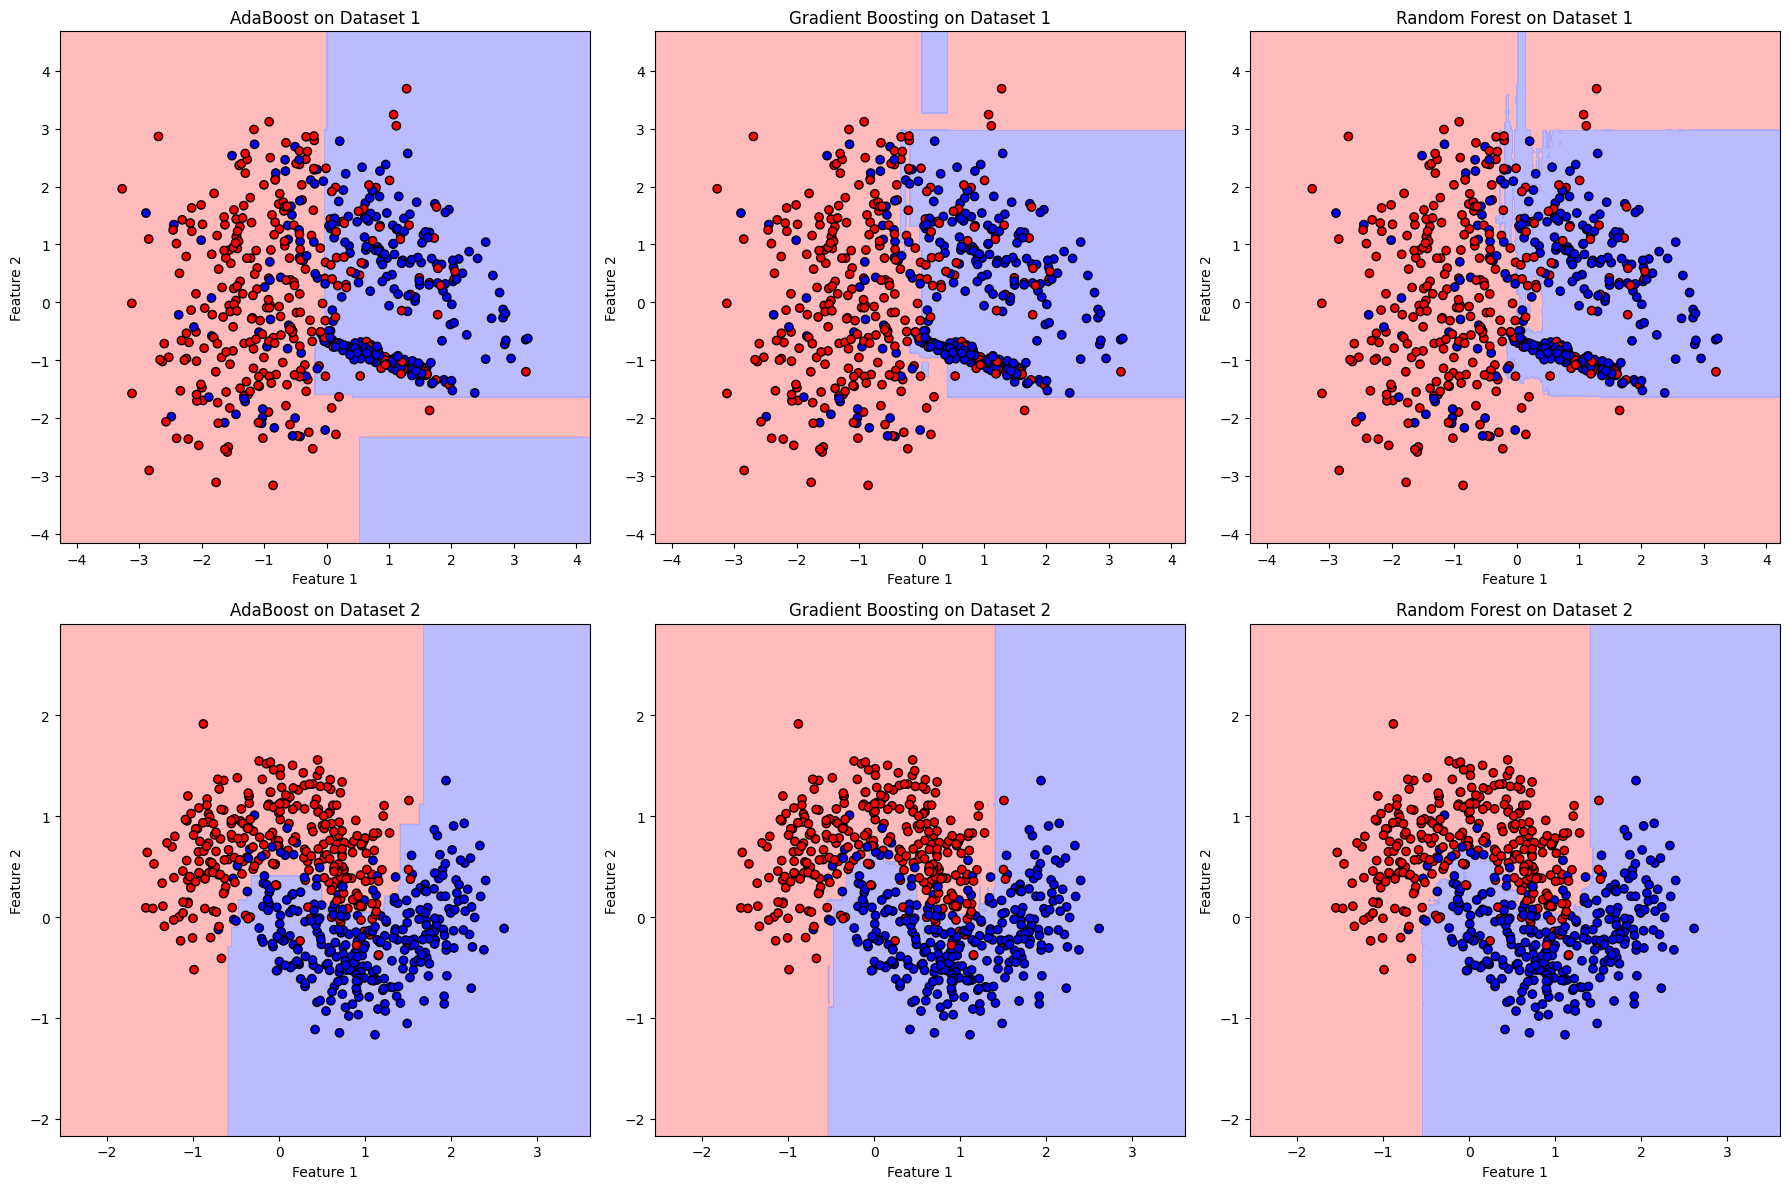


Metrics for Dataset 1:
                   Accuracy  F1-Score   ROC-AUC
AdaBoost           0.765000  0.764657  0.798774
Gradient Boosting  0.771667  0.771486  0.799013
Random Forest      0.773333  0.773175  0.795663

Metrics for Dataset 2:
                   Accuracy  F1-Score   ROC-AUC
AdaBoost           0.911667  0.911678  0.969495
Gradient Boosting  0.898333  0.898343  0.967432
Random Forest      0.901667  0.901670  0.965192


In [ ]:
# Print the accuracy of Custom AdaBoost on each dataset
for dataset_name, (X_train, X_test, Y_train, Y_test) in datasets.items():
    custom_model = best_models[dataset_name]["Custom AdaBoost"]["best_estimator"]
    Y_pred = custom_model.predict(X_test)
    if np.any(np.isin(Y_pred, [0])):
      Y_pred = np.where(Y_pred == 0, -1, 1)
    if np.any(np.isin(Y_test, [0])):
      Y_test = np.where(Y_test == 0, -1, 1)

    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy of Custom AdaBoost on {dataset_name}: {accuracy:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

for i, (dataset_name, (X_train, X_test, Y_train, Y_test)) in enumerate(datasets.items()):
    custom_model = best_models[dataset_name]["Custom AdaBoost"]["best_estimator"]
    ax = axes[i] 
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = custom_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_title(f"Custom AdaBoost on {dataset_name}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()
print("Models Compression:")
# Plot weak classifiers for each model and dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
for row, (dataset_name, (X_train, X_test, Y_train, Y_test)) in enumerate(datasets.items()):
    for col, model_name in enumerate(models.keys()):
        if model_name == "Custom AdaBoost":
          continue
        model = best_models[dataset_name][model_name]["best_estimator"]
        ax = axes[row, col]  
        ax.set_title(f"{model_name} on {dataset_name}")
        x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
        y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
        ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Print tables for accuracy, F1-score, and ROC-AUC for each dataset
metrics = ["Accuracy", "F1-Score", "ROC-AUC"]
results = {dataset_name: {model_name: [] for model_name in models.keys()} for dataset_name in datasets.keys()}

for dataset_name, (X_train, X_test, Y_train, Y_test) in datasets.items():
    for model_name, model_info in best_models[dataset_name].items():
        if model_name == "Custom AdaBoost":
          continue
        model = model_info["best_estimator"]
        Y_pred = model.predict(X_test)
        Y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        results[dataset_name][model_name] = [
            accuracy_score(Y_test, Y_pred),
            f1_score(Y_test, Y_pred, average="weighted"),
            roc_auc_score(Y_test, Y_prob)
        ]

for dataset_name, metrics_results in results.items():
    df = pd.DataFrame.from_dict(metrics_results, orient="index", columns=metrics)
    print(f"\nMetrics for {dataset_name}:")
    print(df)

#### **Performance Metrics**

We will use the following metrics:
1. **Accuracy**: Measures overall correctness.
2. **F1-Score**: Balances precision and recall, particularly useful for imbalanced datasets.
3. **ROC-AUC**: Evaluates the model’s ability to distinguish between classes.

The choice of these metrics ensures a comprehensive evaluation. Accuracy serves as a general measure but may not be reliable for imbalanced or noisy datasets. F1-Score addresses this by balancing precision and recall, which is crucial for noisy or imbalanced data. Finally, ROC-AUC provides insights into the model’s ability to differentiate between classes, particularly in probabilistic predictions.

#### **Grid Search and Hyperparameters**

To identify the best-performing model, we conducted a Grid search for each algorithm and dataset, testing various hyperparameter combinations. Below are the hyperparameters tuned for each model:

1. **AdaBoost**:
   - `n_estimators`: Number of weak learners (values: 50, 100, 200).
   - `learning_rate`: Weight applied to each weak learner (values: 0.01, 0.1, 1).
   - `estimator`: Decision Tree depth (values: 1, 2).
2. **Custom AdaBoost**:
   - `n_estimators`: Number of weak learners (values: 50, 100, 200, 500, 1000).
   - `learning_rate`: Weight applied to each weak learner (values: 0.01, 0.1, 0.5, 0.7, 1).
3. **Gradient Boosting**:
   - `n_estimators`: Number of boosting stages (values: 50, 100, 200).
   - `learning_rate`: Step size shrinkage (values: 0.01, 0.1, 0.5).
   - `max_depth`: Maximum depth of each tree (values: 3, 5, 7).
4. **Random Forest**:
   - `n_estimators`: Number of trees in the forest (values: 50, 100, 200).
   - `max_depth`: Maximum depth of the trees (values: 5, 10, None).
   - `min_samples_split`: Minimum samples required to split an internal node (values: 2, 5, 10).

#### **Hyperparameter Tuning Results**

After performing Grid Search, we selected the hyperparameters with the best accuracy scores for each model and dataset:

- **Dataset 1**:
  - **AdaBoost**: `{'estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 100, 'learning_rate': 0.1}`
  - **Gradient Boosting**: `{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}`
  - **Random Forest**: `{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}`
  - **Custom AdaBoost**: `{n_iter=50, learning_rate=1}`.

- **Dataset 2**:
  - **AdaBoost**: `{'estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 200, 'learning_rate': 0.1}`
  - **Gradient Boosting**: `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}`
  - **Random Forest**: `{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}`
  - **Custom AdaBoost**: `{n_iter=500, learning_rate=0.5}`.

Key insights:
- **Dataset 1**: Random Forest achieves the best overall performance, but Gradient Boosting provides a competitive alternative with slightly better ROC-AUC.
- **Dataset 2**: AdaBoost achieves the highest accuracy and demonstrates superior modeling of complex decision boundaries, with Gradient Boosting providing competitive alternatives.

#### **Results**

##### **Dataset 1: Noisy Data**

| Model              | Accuracy | F1-Score | ROC-AUC |
|--------------------|----------|----------|---------|
| **AdaBoost**       | 0.765000 | 0.764657 | 0.798774 |
| **Gradient Boosting** | 0.771667 | 0.771486 | 0.799013 |
| **Random Forest**  | 0.773333 | 0.773175 | 0.795663 |

##### **Dataset 2: Overfitting-Prone Data**

| Model              | Accuracy | F1-Score | ROC-AUC |
|--------------------|----------|----------|---------|
| **AdaBoost**       | 0.911667 | 0.911678 | 0.969495 |
| **Gradient Boosting** | 0.898333 | 0.898343 | 0.967432 |
| **Random Forest**  | 0.901667 | 0.901670 | 0.965192 |

**Custom AdaBoost Accuracy**:
- **Dataset 1**: 0.77
- **Dataset 2**: 0.91

**Impact of Dataset Properties**:
Model performance is closely tied to dataset properties. Random Forest excels on noisy datasets by reducing the impact of noise through ensemble averaging. Conversely, AdaBoost perform best on datasets with complex decision boundaries by refining predictions iteratively. Gradient Boosting provides a balanced approach.
